<a href="https://colab.research.google.com/github/Castillo-jacqueline/Metodos-numericos-/blob/main/Interpolante_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Agregamos las librerías necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Vamos a construir una tabla de puntos para la interpolación.
Indique cuántos puntos desea proporcionar.
Número de puntos: 3
Ingrese los valores de x. Luego se solicitará f(x) para cada uno.
Valor de x para el punto 1: -2
Valor de f(x) para x = -2.0: 0
Valor de x para el punto 2: -1
Valor de f(x) para x = -1.0: 0
Valor de x para el punto 3: 0
Valor de f(x) para x = 0.0: 1
Puntos ingresados:
Punto 1: x = -2.0, f(x) = 0.0
Punto 2: x = -1.0, f(x) = 0.0
Punto 3: x = 0.0, f(x) = 1.0

Polinomio de interpolación de Newton:
(0.5*x + 1.0)*(x + 1.0)


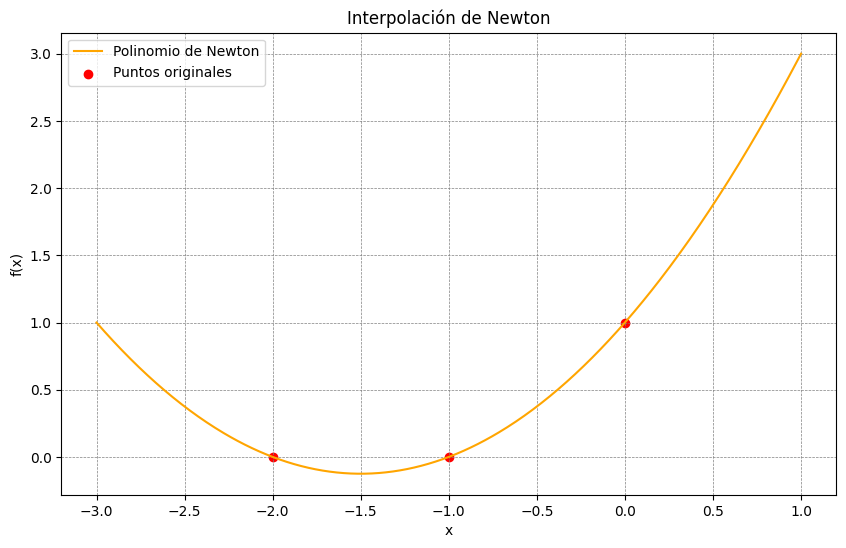

In [7]:
#Dedinimos las funciones
def calcular_polinomio_newton(puntos):
    """
    Calcula el polinomio de interpolación de Newton basado en puntos dados.

    Args:
        puntos (list): Lista de tuplas (x, f(x)) con los puntos a interpolar.

    Returns:
        sympy.Expr: Polinomio de interpolación en forma simbólica.
    """
    x = sp.symbols('x')
    n = len(puntos)

    # Extraer coordenadas y valores
    nodos, valores = zip(*puntos)

    # Crear tabla de diferencias divididas
    tabla = np.zeros((n, n))
    tabla[:, 0] = valores  # Primera columna es igual a los valores de f(x)

    # Calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (nodos[i + j] - nodos[i])

    # Construir el polinomio de interpolación
    polinomio = 0
    for i in range(n):
        termino = tabla[0, i]
        for j in range(i):
            termino *= (x - nodos[j])  # Multiplicar por (x - nodo_j)
        polinomio += termino

    return sp.simplify(polinomio)

def graficar_polinomio(polinomio, puntos):
    """
    Grafica el polinomio y los puntos dados.

    Args:
        polinomio (sympy.Expr): Polinomio a graficar.
        puntos (list): Lista de tuplas (x, f(x)) con los puntos de datos originales.
    """
    x = sp.symbols('x')
    func = sp.lambdify(x, polinomio, modules=["numpy"])

    # Rango para la gráfica
    x_vals = np.linspace(min(p[0] for p in puntos) - 1, max(p[0] for p in puntos) + 1, 500)
    y_vals = func(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="Polinomio de Newton", color="orange")

    # Puntos originales
    x_puntos, y_puntos = zip(*puntos)
    plt.scatter(x_puntos, y_puntos, color="brown", label="Puntos originales")

    plt.title("Interpolación de Newton")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.show()

def obtener_puntos():
    """
    Solicita puntos al usuario.

    Returns:
        list: Lista de puntos ingresados como tuplas (x, f(x)).
    """
    print("Vamos a construir una tabla de puntos para la interpolación.")
    print("Indique cuántos puntos desea proporcionar.")

    while True:
        try:
            n = int(input("Número de puntos: "))
            if n <= 0:
                raise ValueError
            break
        except ValueError:
            print("Por favor, ingrese un número entero positivo.")

    puntos = []
    print("Ingrese los valores de x. Luego se solicitará f(x) para cada uno.")
    for i in range(1, n + 1):
        while True:
            try:
                x = float(input(f"Valor de x para el punto {i}: "))
                break
            except ValueError:
                print("Entrada inválida. Por favor, proporcione un número.")

        while True:
            try:
                fx = float(input(f"Valor de f(x) para x = {x}: "))
                puntos.append((x, fx))
                break
            except ValueError:
                print("Entrada inválida. Por favor, proporcione un número.")

    print("Puntos ingresados:")
    for i, (x, fx) in enumerate(puntos, start=1):
        print(f"Punto {i}: x = {x}, f(x) = {fx}")

    return puntos

def main():
    puntos = obtener_puntos()
    if not puntos:
        print("No se ingresaron puntos. Fin del programa.")
        return

    polinomio = calcular_polinomio_newton(puntos)
    print("\nPolinomio de interpolación de Newton:")
    print(polinomio)

    graficar_polinomio(polinomio, puntos)

if __name__ == "__main__":
    main()

Elaborado por **Castillo Zaragoza Ximena Jacqueline**